In [1]:
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt



with MPRester("TSpOfnCNHrXI8ZzR") as m:

    structure = m.get_structure_by_material_id("mp-5077")
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-5077")

## Bande interdite

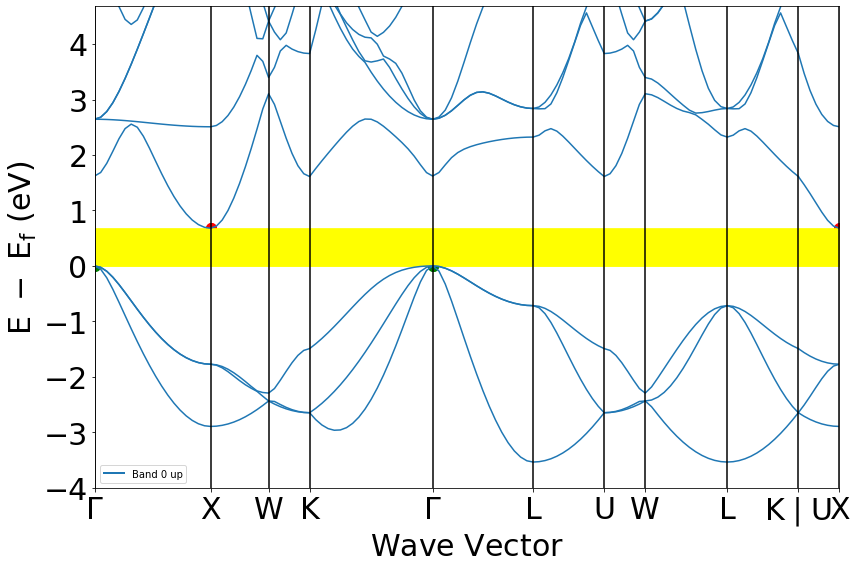

In [2]:
bplot = BSPlotter(bandstructure)
bplot.get_plot(vbm_cbm_marker=True)
data= bplot.bs_plot_data()
d = data.get('ticks').get('distance')
plt.fill_between(np.linspace(0,d[-1],1000),data['vbm'][0][1],data['cbm'][0][1],color='yellow')

In [3]:
en = data.get('energy')
dist = data['distances']

#Data
print("Caractéristiques de la bande interdite :")
print(data.get('band_gap'), "eV")
print("C'est une bande indirecte avec une largeur de 0.6796 eV et un vecteur de transition Gamma-X")

Caractéristiques de la bande interdite :
Indirect \Gamma-X bandgap = 0.6796000000000002 eV
C'est une bande indirecte avec une largeur de 0.6796 eV et un vecteur de transition Gamma-X


## Dispersion

Il faut trouver le maximum de la bande de valence et le minimum de la bande de conduction

In [4]:
data= bplot.bs_plot_data()
d = data.get('ticks').get('distance')
dist = np.array([d[1]-d[0], d[3]-d[1], d[5]-d[3], d[7]-d[5], d[9]-d[7], d[11]-d[9], d[13]-d[11], d[15]-d[13], d[17]-d[15], d[18]-d[17],])
directions = ["\u0393 - X","X - W", "W - K","K - \u0393","\u0393 - L","L - U", "U - W","W - L","L - K|U","K|U - X"]

print("Bandes contenant le max de la bande de valence :" , bandstructure.get_vbm()['band_index'])
print("Bandes contenant le min de la bande de conduction :" ,bandstructure.get_cbm()['band_index'])
print("La bande de valence max est la 8eme et la bande de conduction min est la 9eme" )

Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [6, 7, 8]})
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [9]})
La bande de valence max est la 8eme et la bande de conduction min est la 9eme


In [5]:
# Pour la bande de valence
pmax = 0
pmin = 1000
imaxC = 0
iminC = 0

for i in range(len(dist)) :
    energy = data.get('energy').get('1')[i][9]
    Ea = energy[0]
    Eb = energy[-1]
    pente = (Eb-Ea)/dist[i]
    
    if np.abs(pente) > np.abs(pmax) :
        pmax = pente
        imaxC = i
        
    if np.abs(pente) < np.abs(pmin) :
        pmin = pente
        iminC = i
        
print("Direction avec la plus grande dispersion : ", directions[imaxC], "avec une pente de ", pmax)
print("Direction avec la plus petite dispersion : ", directions[iminC], "avec une pente de ", pmin)

Direction avec la plus grande dispersion :  X - W avec une pente de  5.285564172944547
Direction avec la plus petite dispersion :  K - Γ avec une pente de  0.008631187392007977


In [6]:
# Pour la bande de conduction
pmax = 0
pmin = 1000
imaxV = 0
iminV = 0

for i in range(len(dist)) :
    energy = data.get('energy').get('1')[i][8]
    Ea = energy[0]
    Eb = energy[-1]
    pente = (Eb-Ea)/dist[i]
    
    if np.abs(pente) > np.abs(pmax) :
        pmax = pente
        imaxV = i
        
    if np.abs(pente) < np.abs(pmin) :
        pmin = pente
        iminV = i
        
print("Direction avec la plus grande dispersion : ", directions[imaxV], "avec une pente de ", pmax)
print("Direction avec la plus petite dispersion : ", directions[iminV], "avec une pente de ", pmin)

Direction avec la plus grande dispersion :  U - W avec une pente de  -2.471602161040009
Direction avec la plus petite dispersion :  K|U - X avec une pente de  -0.8680508462819155


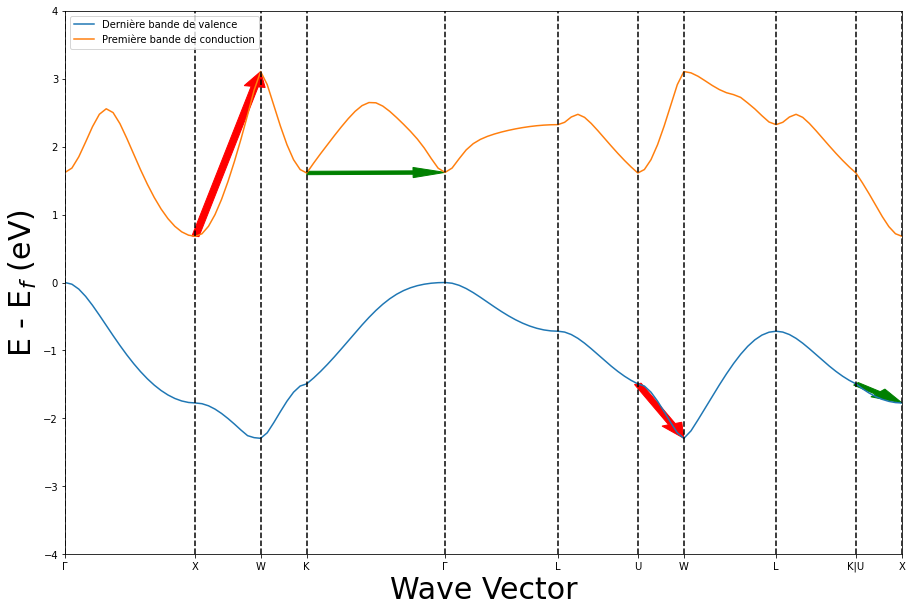

In [7]:
a = data.get('distances')
x = [y for b in a for y in b]

V8 = data.get('energy').get('1')[0][8]
for i in range(1,10):
    V8 = np.concatenate((V8,data.get('energy').get('1')[i][8]))
    
C = data.get('energy').get('1')[0][9]
for i in range(1,10):
    C = np.concatenate((C,data.get('energy').get('1')[i][9]))

plt.figure(figsize=(15,10)) 
plt.plot(x,V8,label='Dernière bande de valence')
plt.plot(x,C,label='Première bande de conduction')

xs = [d[0],d[1],d[3],d[5],d[7],d[9],d[11],d[13],d[15],d[17],d[18]]
plt.xticks(xs,['\u0393',"X","W","K",'\u0393',"L","U","W","L","K|U","X"])

for di in xs :
    plt.axvline(di,color='black',ls='--')
    
plt.axis([0,d[-1],-4,4])
plt.legend()
plt.xlabel("Wave Vector",fontsize=30)
plt.ylabel("E - E$_f$ (eV)",fontsize=30)

plt.arrow(xs[imaxV],data.get('energy').get('1')[imaxV][8][0],dist[imaxV],
          data.get('energy').get('1')[imaxV][8][-1]-data.get('energy').get('1')[imaxV][8][0], 
          width = 0.05,length_includes_head=True,color='r')
plt.arrow(xs[iminV],data.get('energy').get('1')[iminV][8][0],dist[iminV],
          data.get('energy').get('1')[iminV][8][-1]-data.get('energy').get('1')[iminV][8][0],
          width = 0.05,length_includes_head=True,color='g')
plt.arrow(xs[imaxC],data.get('energy').get('1')[imaxC][9][0],dist[imaxC],
          data.get('energy').get('1')[imaxC][9][-1]-data.get('energy').get('1')[imaxC][9][0],
          width = 0.05,length_includes_head=True,color='r')
plt.arrow(xs[iminC],data.get('energy').get('1')[iminC][9][0],dist[iminC],
          data.get('energy').get('1')[iminC][9][-1]-data.get('energy').get('1')[iminC][9][0],
          width = 0.05,length_includes_head=True,color='g')

plt.show()

## Masse effective

Pour calculer la masse effective nous allons utiliser la formule : $$ m*_{ij} = \hbar^2 (\frac{\delta^2 E}{\delta k_i \delta k_j})^{-1}$$
L'energie peut se generaliser en faisant une interpolation comme :
$$E = a k^2 + b k + c $$ 

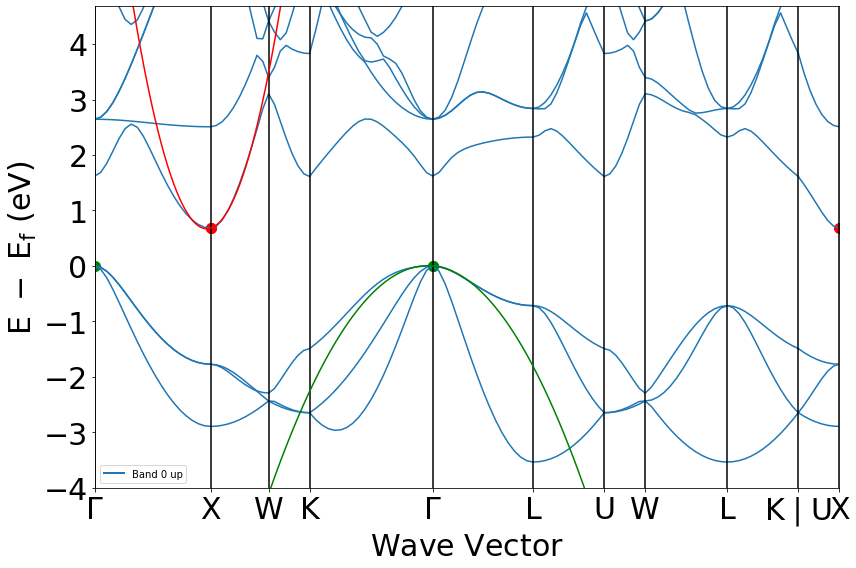

In [8]:
ecart = 3

x3v = np.array([data['distances'][3][-ecart-1],data['distances'][4][0],data['distances'][4][ecart]])
x3c = np.array([data['distances'][0][-ecart-1],data['distances'][1][0],data['distances'][1][ecart]])

y3v = np.array([data.get('energy').get('1')[3][8][-ecart-1],data.get('energy').get('1')[4][8][0],data.get('energy').get('1')[4][8][ecart]])
coefv = np.polyfit(x3v,y3v,2)

y3c = np.array([data.get('energy').get('1')[0][9][-ecart-1],data.get('energy').get('1')[1][9][0],data.get('energy').get('1')[1][9][ecart]])
coefc = np.polyfit(x3c,y3c,2)

x = np.linspace(0,d[-1],1000)

yv =coefv[0]*x**2+coefv[1]*x+coefv[2]
yc =coefc[0]*x**2+coefc[1]*x+coefc[2]

bplot.get_plot(vbm_cbm_marker=True)
plt.plot(x,yv,color='g')
plt.plot(x,yc,color='r')
plt.show()


In [9]:
h_ = (6.62607015e-34)/(2*np.pi)
to_SI = 1e20/1.60218e-19
mv = (h_**2/(2*coefv[0]))*to_SI
mc = (h_**2/(2*coefc[0]))*to_SI
me = 9.1094e-31

print("Masse effective au sommet de la dernière bande de valence : \n m*= ", mv, "[kg] \n me* = ",mv/me)
print("----------------")
print("Masse effective à la base de la première bande de conduction : \n m*= ", mc, "[kg] \n me* = ",mc/me)

Masse effective au sommet de la dernière bande de valence : 
 m*=  -1.3320223270666795e-30 [kg] 
 me* =  -1.4622503425765467
----------------
Masse effective à la base de la première bande de conduction : 
 m*=  2.94041660856129e-31 [kg] 
 me* =  0.3227892735593223
